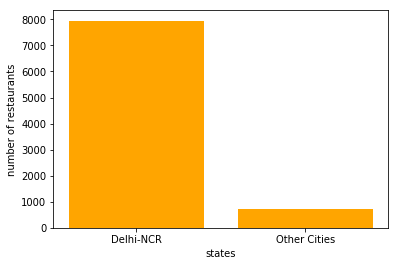

Delhi-NCR=  7947
Others=  705


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json


dataframe=pd.read_csv('datasets/zomato.csv', encoding='ISO-8859-1')
df=dataframe.copy()
#summarised all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR.
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
#filtering and keeping all the indian cities in the data frame
#filtered all the indian cities/states
df=df.loc[df.Currency=='Indian Rupees(Rs.)']



#now in the filtered dataframe i have copied all the elements of column 'City', in the filtered dataframe to a numpy array np_City
cities=[]
for i in df['City']:
    cities.append(i)
np_city=np.array(cities)
#initialised two variables corresponding to the restaurants in delhi ncr and rest states
count_delhi=0
other=0
for i in np_city:
    if i=='Delhi-NCR':
        count_delhi+=1
    else:
        other+=1
#plotted a graph between number of restaurants present in delhi ncr and the rest of india.
plt.bar(['Delhi-NCR', 'Other Cities'], [count_delhi, other], color='orange')
plt.xlabel('states')
plt.ylabel('number of restaurants')
plt.show()
print('Delhi-NCR= ', count_delhi)
print('Others= ', other)

In [3]:
#cleaning all the null values and keeping all the non null values in the dataframe
df=df.loc[df.Cuisines.notnull()]
in_delhi=[]#i have created this list to append all the cuisines in delhi according to the dataset
for i in df.loc[df['City']=='Delhi-NCR', 'Cuisines']:
    for j in i.split(','):
        in_delhi.append(j.strip())
in_delhi=set(in_delhi)#creating a set will give me all the unique cusinies present in delhi
#now i have created a list corresponding to the cuisines present in other states of india.
other_states=[]#in this list i have appended all those cuisines which are present in rest parts of india
for i in df.loc[df['City']!='Delhi-NCR', 'Cuisines']:
    if i!=np.nan:
        for j in i.split(','):
            other_states.append(j.strip())
other_states=set(other_states)#created a set to get all the unique cuisines in other parts of india
not_in_delhi_ncr_acc_to_dataset=other_states-in_delhi #subtracting these will give me the cuisines which are present in all the other parts of india except new delhi.

#cuisines, other_states, in_delhi
not_in_delhi_ncr_acc_to_dataset
#according to the dataset these cuisines are not present in delhi.

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [4]:
# api-key= 14fff80fb67efe097bc7033153debb2e
#city id of Delhi-NCR is 1
#now i will extract the cuisines present in delhi ncr according to the zomato api
params={"user-key":"14fff80fb67efe097bc7033153debb2e", "city_id":1}
headers={"accept":"application/json", "user-key":"14fff80fb67efe097bc7033153debb2e"}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines', params=params, headers=headers)
data=response.json()
#
cuisines_from_api_in_delhi=[]
for i in data['cuisines']:
    cuisines_from_api_in_delhi.append(i['cuisine']['cuisine_name'])
cuisines_from_api_in_delhi=set(cuisines_from_api_in_delhi)
#i have created a set of all the uniques cuisines which i found from the zomato api.
# now we have two things ---->   1. cuisines_from_api_in_delhi          2. not_in_delhi_ncr_acc_to_dataset
#now i have printed all those cuisines which are actually in delhi ncr but not mentioned in the dataset.
for i in cuisines_from_api_in_delhi:
    if i in not_in_delhi_ncr_acc_to_dataset:
        print(i)
#following is the list of those cuisines which are not in delhi_ncr according to the dataset. but these are actually available
#in delhi-ncr according to zomato api. it seems like it is just due to incomplete dataset.

German
BBQ


In [5]:
#i have divided this code into two parts
#the first part i have derived the top 10 cuisines served by maximum number of restaurants in Delhi NCR
#and in the second part i have derived the top 10 cuisines served by maximum number of restaurants in other indian states.
#here we go... first of all i have created a new copy of the original dataframe so that there is no confusion around the previously used data.
df=dataframe.copy()
#now changing the data in accordance with the question
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
#taking indian cities only 
df=df.loc[df.Currency=='Indian Rupees(Rs.)']



all_cuisines=[]#it indicates all cuisines in delhi ncr only
df=df.loc[df.Cuisines.notnull()]#any cuisinie value should not be null, i have taken care of that
df=df.loc[df['City']=='Delhi-NCR']#i have kept all the city values as Delhi-NCR
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())#saves all the cuisinies in the variable all_cuisines
dic_delhi=dict()# i have created this dictionary because here i will save the no. of restaurants serving a perticular cuisinie in delhi NCR
for i in all_cuisines:
    if i in dic_delhi.keys():
        dic_delhi[i]+=1
    else:
        dic_delhi[i]=1#saved all the values in dictionary
cus1=[]#from the dictionary i have saved the names and no. of restaurants in the variables times1(no. of times the perticular cuisinie occured in the restaurant in delhi ncr)
times1=[]# and cus1 is having the names of all te cuisines. 
#i have created these tw variables because i am planning to create a numpy array of them and use the numpy functions for sort them.

for i in dic_delhi.keys():
    cus1.append(i)
    times1.append(dic_delhi[i])
#i have apended all the dictionary values to the two lists.
np_cus1=np.array(cus1)#created a numpy array out of those two lists
np_times1=np.array(times1)
np_cus1=np_cus1[np.argsort(np_times1)][::-1]#sorted
np_times1=np.sort(np_times1)[::-1]#sorted
print("The following data is corresponding to the restaurants in Delhi-NCR")
for i in range(10):#printed
    print(np_cus1[i], ": ", np_times1[i])

#=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
print()
#this is the second part of the code. i just copied it from above and made some changes accordingly.
#created a new copy of the dataframe because i dont want to mess with is previous changed dataset.
df=dataframe.copy()

lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
df=df.loc[df.Currency=='Indian Rupees(Rs.)']
#did the similar thing that i did in the first part.
all_cuisines=[]
df=df.loc[df['City']!='Delhi-NCR']
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())
dic_other=dict()
for i in all_cuisines:
    if i in dic_other.keys():
        dic_other[i]+=1
    else:
        dic_other[i]=1
cus2=[]
times2=[]
for i in dic_other.keys():
    cus2.append(i)
    times2.append(dic_other[i])
np_cus2=np.array(cus2)
np_times2=np.array(times2)
np_cus2=np_cus2[np.argsort(np_times2)][::-1]
np_times2=np.sort(np_times2)[::-1]
print("The following data is corresponding to those restaurants which are not in Delhi-NCR")
for i in range(10):

    print(np_cus2[i], ": ", np_times2[i])

The following data is corresponding to the restaurants in Delhi-NCR
North Indian :  3597
Chinese :  2448
Fast Food :  1866
Mughlai :  933
Bakery :  697
South Indian :  569
Continental :  547
Desserts :  542
Street Food :  538
Italian :  535

The following data is corresponding to those restaurants which are not in Delhi-NCR
North Indian :  349
Chinese :  242
Continental :  177
Italian :  147
Cafe :  136
Fast Food :  97
South Indian :  62
Mughlai :  59
Desserts :  55
Mexican :  50


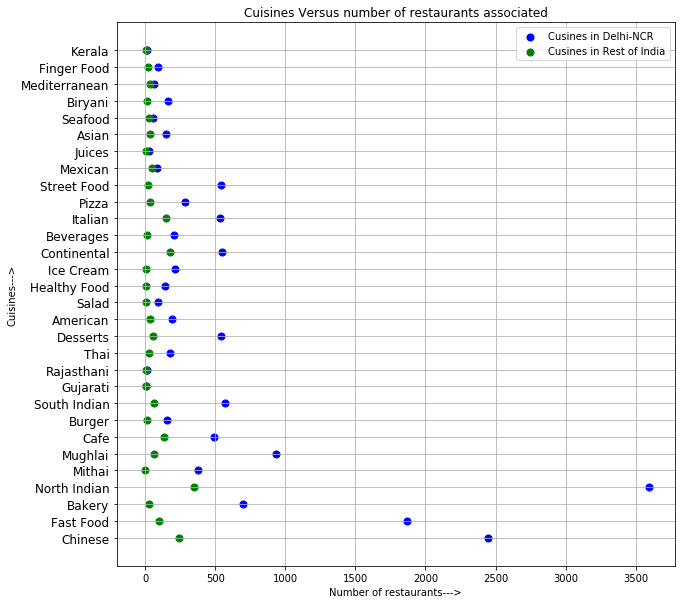

In [6]:
cusi=[]
inside_delhi=[]#list containing number of restaurants with a perticular cuisine in delhi
inside_others=[]#list containing number of restaurants with a perticular cuisinie in rest of the indian states
for i in dic_delhi.keys():
    if i in dic_other:
        cusi.append(i)
        inside_delhi.append(dic_delhi[i])
        inside_others.append(dic_other[i])
plt.figure(figsize=(10, 10))
plt.scatter(inside_delhi[0:30], cusi[0:30], c='blue', s=50)
plt.scatter(inside_others[0:30], cusi[0:30], c='green', s=50)
plt.yticks(size=12)
plt.grid()
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cuisines--->')
plt.title('Cuisines Versus number of restaurants associated')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.show()

<h1>Detailed Analysis</h1><br>
From the above graph we can infer that "North Indian" cusinie is the most popular among restaurants of Delhi_NCR as well as other states. Here I have plotted only those 30 important cusinies which are common in both Delhi-NCR and other states. There are some cusinies present in other states and are not present in any restaurant of Delhi-NCR. After North Indian cusinie we have chinese cusinie with 2448 restaurants in Delhi-NCR and 242 in other states of india. After these two we have fast food with 1866 restaurants in Delhi_NCR and 97 in other states(a huge difference). After this we have Mughlai cusinie in Delhi-NCR with 933 restaurants and 59 in the states other than Delhi-NCR. and there are many more cusinies as show in the graph.